<a href="https://colab.research.google.com/github/tagmevenky/ensembled/blob/main/VenkateshBM_211AI039_TMFS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import random
import warnings
warnings.simplefilter('ignore')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
filename = "part1.csv"
df = pd.read_csv(filename, index_col=False )

In [ ]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,645493,-999.000,165.270,58.917,48.435,-999.0,-999.0,-999.0,1.275,6.494,...,1.227,-0.604,-999.0,-999.0,-999.0,46.400,0.000814,s,b,0.006690
1,645494,102.795,32.176,77.573,5.414,-999.0,-999.0,-999.0,3.028,5.414,...,-999.000,-999.000,-999.0,-999.0,-999.0,0.000,1.420226,b,v,2.582296
2,645495,-999.000,84.636,102.417,4.378,-999.0,-999.0,-999.0,2.865,4.378,...,-999.000,-999.000,-999.0,-999.0,-999.0,0.000,0.830964,b,b,6.767728
3,645496,150.723,33.892,101.745,80.294,-999.0,-999.0,-999.0,2.440,3.879,...,3.093,-1.444,-999.0,-999.0,-999.0,79.526,0.000461,s,v,0.000840
4,645497,207.802,74.166,133.039,4.125,-999.0,-999.0,-999.0,3.215,4.125,...,-999.000,-999.000,-999.0,-999.0,-999.0,0.000,1.450478,b,v,2.637302


In [ ]:
 "DER_mass_transverse_met_lep",
    "DER_pt_h",
    "DER_pt_tot",
    "DER_mass_MMC",
    "DER_deltar_tau_lep",
    "PRI_met",
    "PRI_jet_all_pt",
    "PRI_jet_leading_phi",
    "PRI_jet_leading_eta",
    "PRI_met_sumet",
    "PRI_lep_phi",
    "DER_pt_ratio_lep_tau",
    "PRI_met_phi",
    "PRI_tau_eta",
    "PRI_lep_eta",
    "PRI_tau_phi",
    "DER_met_phi_centrality",
    "DER_mass_vis",
    "PRI_jet_num",
    "PRI_jet_leading_pt"

###### We have 30 features

In [ ]:
df.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

We have no null or NaN values in the data set.

In [ ]:
duplicate = df[df.duplicated()]

In [ ]:
duplicate

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight


There are no duplicate records

In [ ]:
df=df.drop(['EventId'],axis=1)

In [ ]:
to_drop = ['Label']

X = df.drop(to_drop, axis=1)

y = df['Label']  # Assuming 'Label' is the column name you want to select

In [ ]:
df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,-999.000,165.270,58.917,48.435,-999.0,-999.0,-999.0,1.275,6.494,136.127,...,1.227,-0.604,-999.0,-999.0,-999.0,46.400,0.000814,s,b,0.006690
1,102.795,32.176,77.573,5.414,-999.0,-999.0,-999.0,3.028,5.414,68.104,...,-999.000,-999.000,-999.0,-999.0,-999.0,0.000,1.420226,b,v,2.582296
2,-999.000,84.636,102.417,4.378,-999.0,-999.0,-999.0,2.865,4.378,74.252,...,-999.000,-999.000,-999.0,-999.0,-999.0,0.000,0.830964,b,b,6.767728
3,150.723,33.892,101.745,80.294,-999.0,-999.0,-999.0,2.440,3.879,176.784,...,3.093,-1.444,-999.0,-999.0,-999.0,79.526,0.000461,s,v,0.000840
4,207.802,74.166,133.039,4.125,-999.0,-999.0,-999.0,3.215,4.125,124.605,...,-999.000,-999.000,-999.0,-999.0,-999.0,0.000,1.450478,b,v,2.637302


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272745 entries, 0 to 272744
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 272745 non-null  float64
 1   DER_mass_transverse_met_lep  272745 non-null  float64
 2   DER_mass_vis                 272745 non-null  float64
 3   DER_pt_h                     272745 non-null  float64
 4   DER_deltaeta_jet_jet         272745 non-null  float64
 5   DER_mass_jet_jet             272745 non-null  float64
 6   DER_prodeta_jet_jet          272745 non-null  float64
 7   DER_deltar_tau_lep           272745 non-null  float64
 8   DER_pt_tot                   272745 non-null  float64
 9   DER_sum_pt                   272745 non-null  float64
 10  DER_pt_ratio_lep_tau         272745 non-null  float64
 11  DER_met_phi_centrality       272745 non-null  float64
 12  DER_lep_eta_centrality       272745 non-null  float64
 13 

We would need to perform encoding for target column

In [ ]:
df.KaggleWeight.unique()

array([6.68971400e-03, 2.58229649e+00, 6.76772763e+00, ...,
       6.42047161e+01, 5.32842580e+01, 6.85992690e+01])

In [ ]:
df.DER_sum_pt.unique()

array([136.127,  68.104,  74.252, ..., 230.771, 428.037, 198.989])

In [ ]:
df.DER_pt_ratio_lep_tau.unique()

array([1.729, 0.991, 1.808, ..., 6.741, 5.666, 6.685])

In [ ]:
df.PRI_met_sumet.unique()

array([196.285, 131.374, 103.556, ..., 303.668, 266.919,  97.379])

In [ ]:
df.PRI_jet_num.unique()

array([1, 0, 2, 3])

In [ ]:
df.Weight.unique()

array([8.14480000e-04, 1.42022626e+00, 8.30963812e-01, ...,
       1.43312145e+00, 1.18936454e+00, 1.53121281e+00])

There are two classes:


In [ ]:
Label_mapping = {
    's'  : 0,
    'b' : 1
}

df['Label'] = df['Label'].map(Label_mapping)

Text(0.5, 1.0, 'Target Distribution')

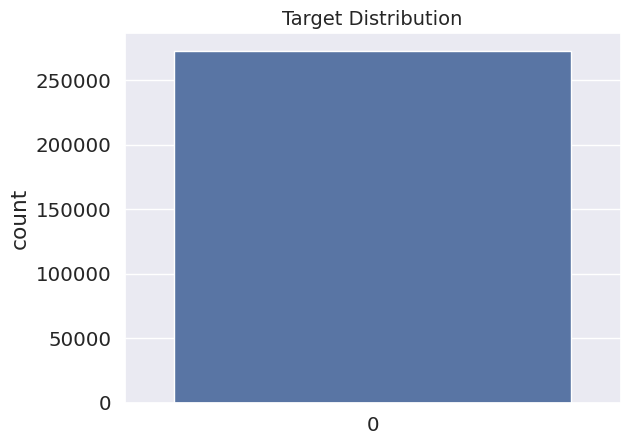

In [ ]:
sns.countplot(df['Label'])
plt.title("Target Distribution", fontsize=14)

Background:1
Signal:0
The dataset is not balanced.
Background is major class.


<Axes: >

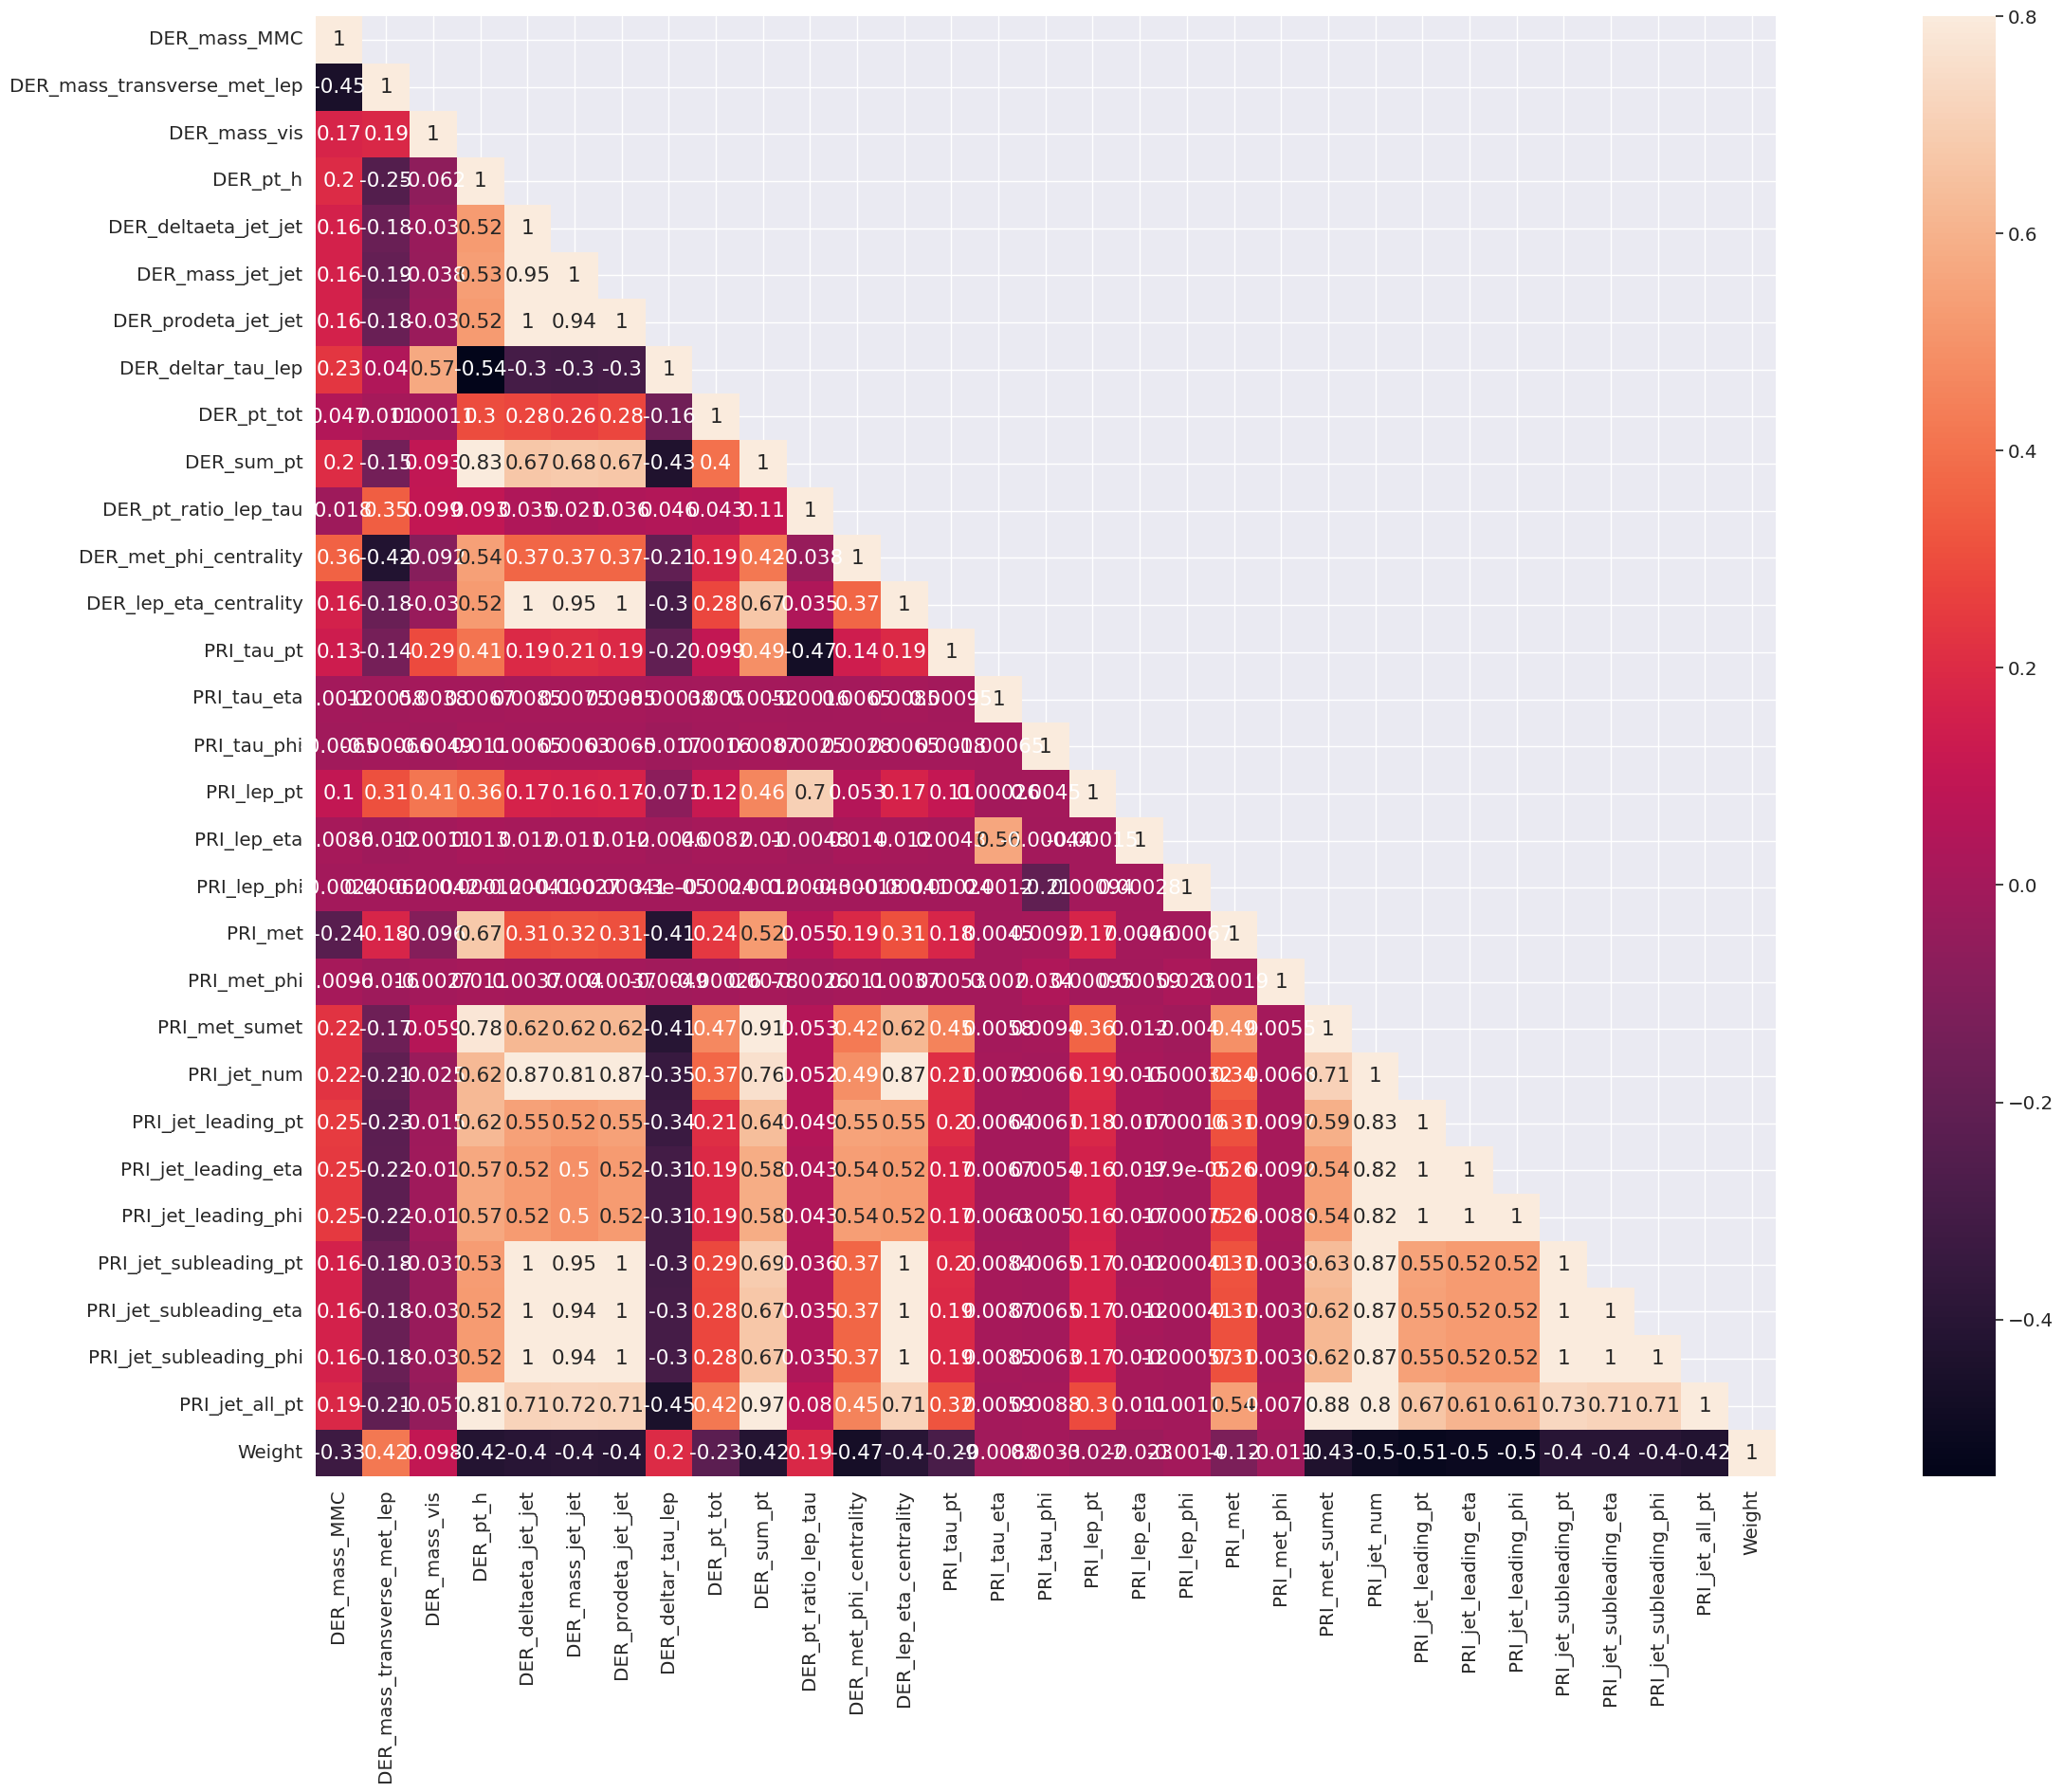

In [ ]:
corrMatt = df[['DER_mass_MMC', 'DER_mass_transverse_met_lep','DER_mass_vis', 'DER_pt_h','DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
                     'DER_prodeta_jet_jet',  'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
               'DER_lep_eta_centrality', 'PRI_tau_pt','PRI_tau_eta','PRI_tau_phi','PRI_lep_pt','PRI_lep_eta','PRI_lep_phi',
              'PRI_met','PRI_met_phi','PRI_met_sumet','PRI_jet_num','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi',
              'PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi','PRI_jet_all_pt','Weight']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(40,20)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [ ]:
feat = ['DER_mass_MMC', 'DER_mass_transverse_met_lep','DER_mass_vis', 'DER_pt_h','DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
                     'DER_prodeta_jet_jet',  'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
                'PRI_tau_pt','PRI_tau_eta','PRI_tau_phi','PRI_lep_pt','PRI_lep_eta','PRI_lep_phi',
              'PRI_met','PRI_met_phi','PRI_met_sumet','PRI_jet_num',
              'PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi','PRI_jet_all_pt','Weight']

###### From the corelation matrix we obsereved that following features are highly corelated to another crucial features so we will drop those.
'PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi','DER_lep_eta_centrality'

In [ ]:
train = df.iloc[:174999]
test = df.iloc[174999:]


In [ ]:
print(feat)

['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'Weight']


In [ ]:
Target = 'Label'

###### Missing records are marked as -999



Text(0.5, 1.0, 'PRI Jet Num Distribution')

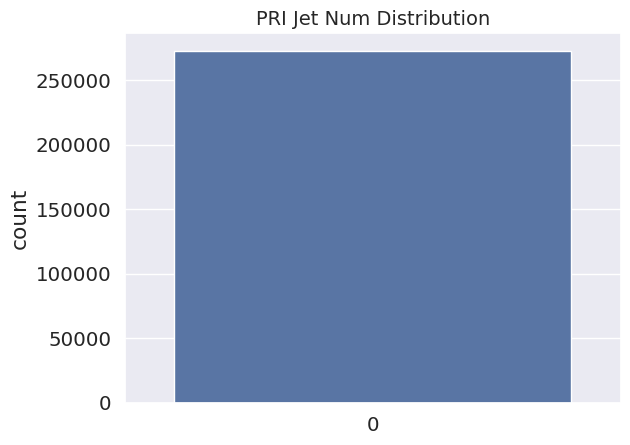

In [ ]:
sns.countplot(df['PRI_jet_num'])
plt.title("PRI Jet Num Distribution", fontsize=14)

**PRI_jet_num indicates missing data
0: features related to jets were all missing data
1: features related to primary jets were no longer missing data, but those related to 2 or more jets were still missing
2 or more jets: all features related to jets contained data**

Majority of the data are missing and imputed with -999. We will not treat them as outliers.

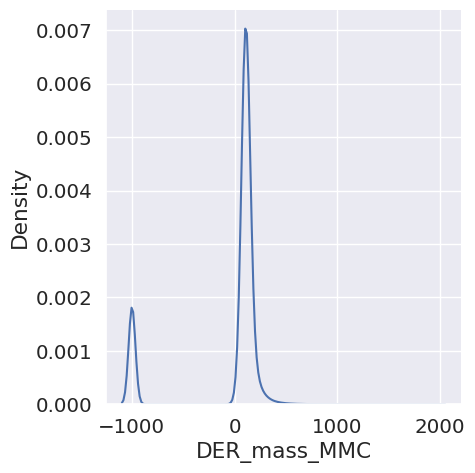

In [ ]:
sns.displot(df, x="DER_mass_MMC", kind="kde")

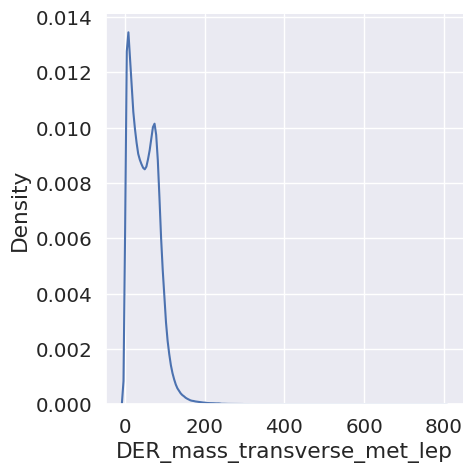

In [ ]:
sns.displot(df, x="DER_mass_transverse_met_lep", kind="kde")

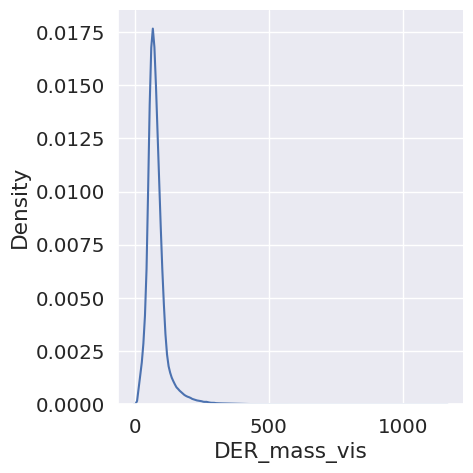

In [ ]:
sns.displot(df, x="DER_mass_vis", kind="kde")

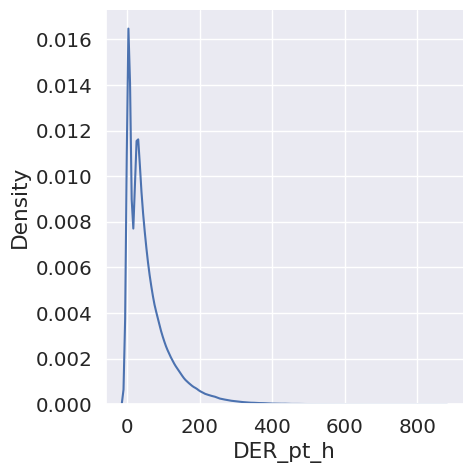

In [ ]:
sns.displot(df, x="DER_pt_h", kind="kde")

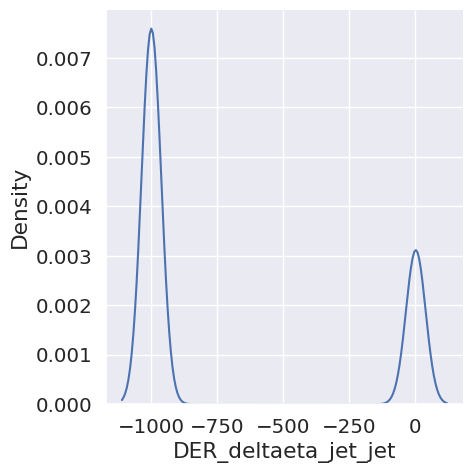

In [ ]:
sns.displot(df, x="DER_deltaeta_jet_jet", kind="kde")

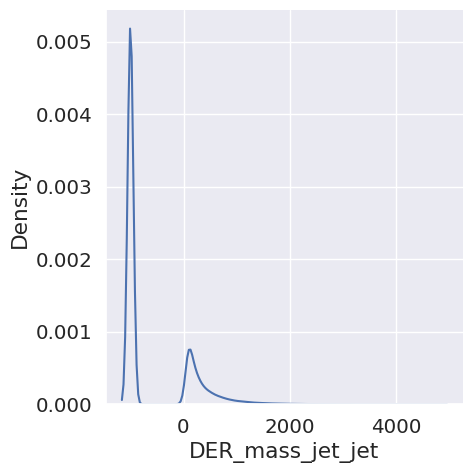

In [ ]:
sns.displot(df, x="DER_mass_jet_jet", kind="kde")

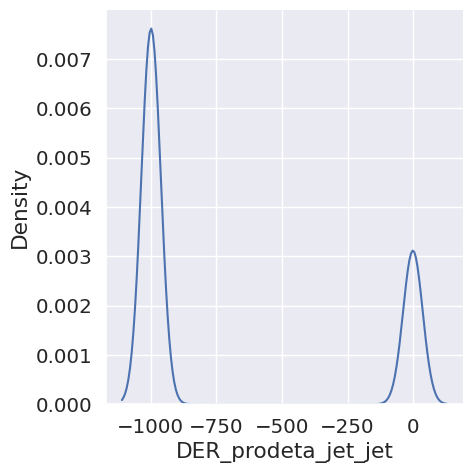

In [ ]:
sns.displot(df, x="DER_prodeta_jet_jet", kind="kde")

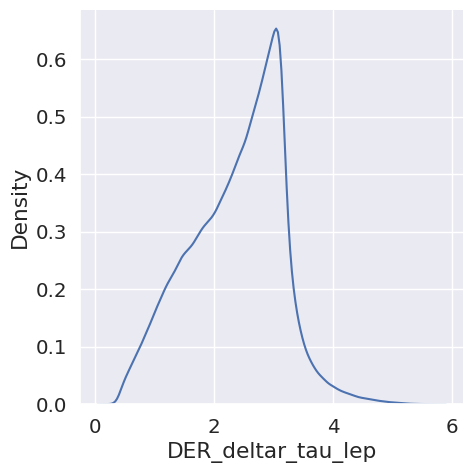

In [ ]:
sns.displot(df, x="DER_deltar_tau_lep", kind="kde")

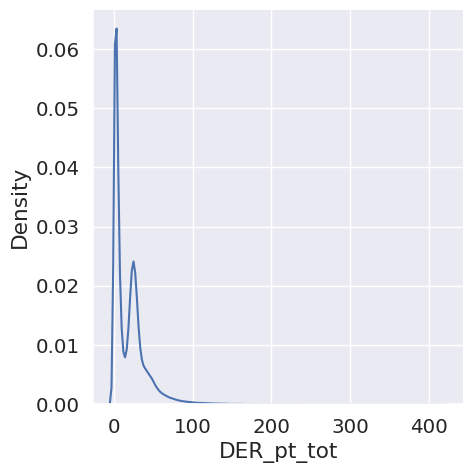

In [ ]:
sns.displot(df, x="DER_pt_tot", kind="kde")

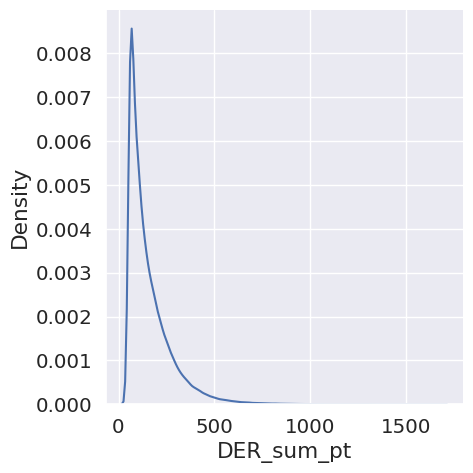

In [ ]:
sns.displot(df, x="DER_sum_pt", kind="kde")

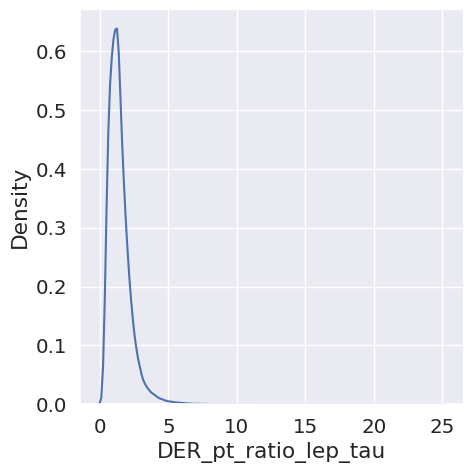

In [ ]:
sns.displot(df, x="DER_pt_ratio_lep_tau", kind="kde")

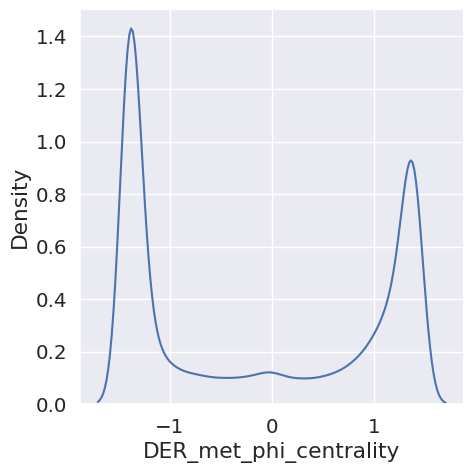

In [ ]:
sns.displot(df, x="DER_met_phi_centrality", kind="kde")

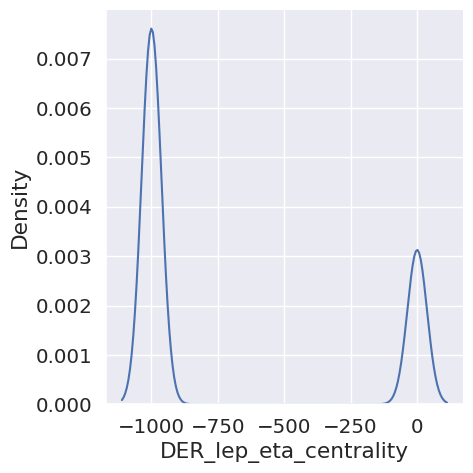

In [ ]:
sns.displot(df, x="DER_lep_eta_centrality", kind="kde")

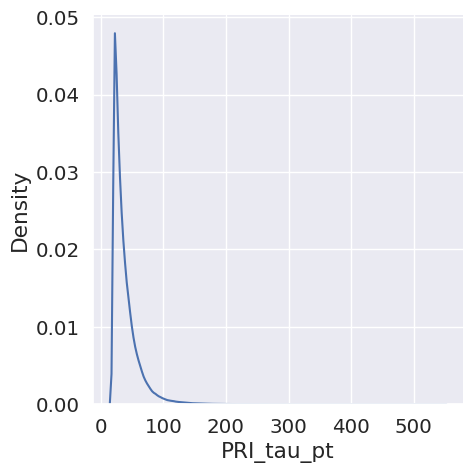

In [ ]:
sns.displot(df, x="PRI_tau_pt", kind="kde")

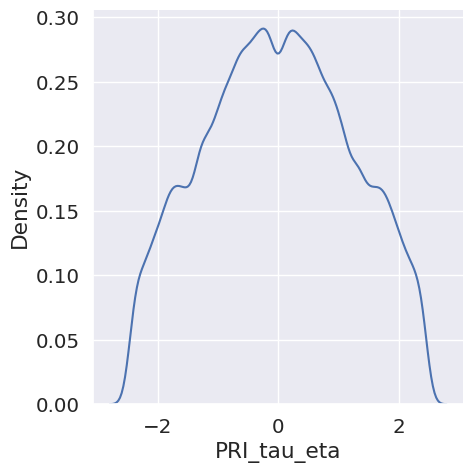

In [ ]:
sns.displot(df, x="PRI_tau_eta", kind="kde")

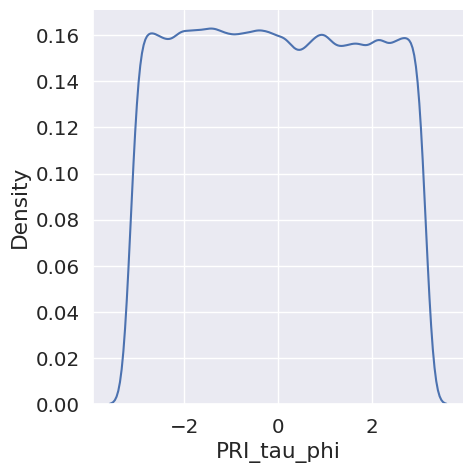

In [ ]:
sns.displot(df, x="PRI_tau_phi", kind="kde")

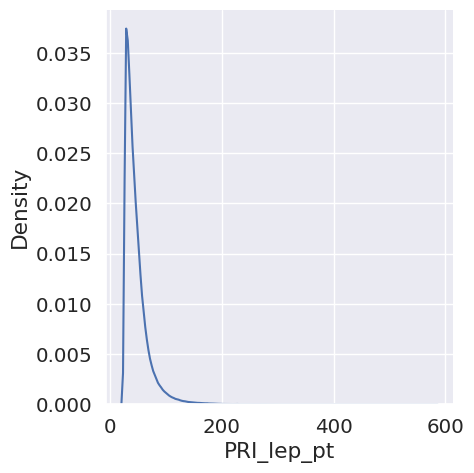

In [ ]:
sns.displot(df, x="PRI_lep_pt", kind="kde")

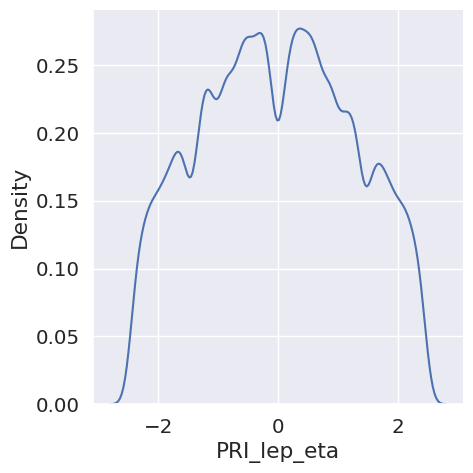

In [ ]:
sns.displot(df, x="PRI_lep_eta", kind="kde")

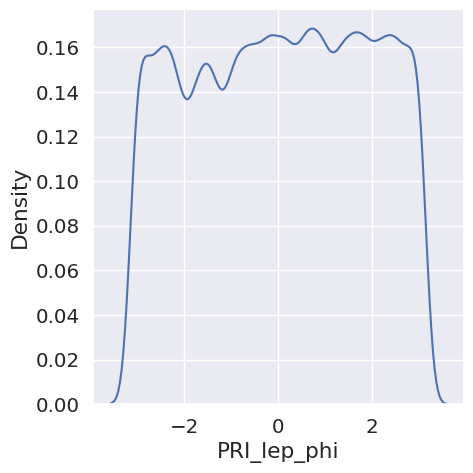

In [ ]:
sns.displot(df, x="PRI_lep_phi", kind="kde")

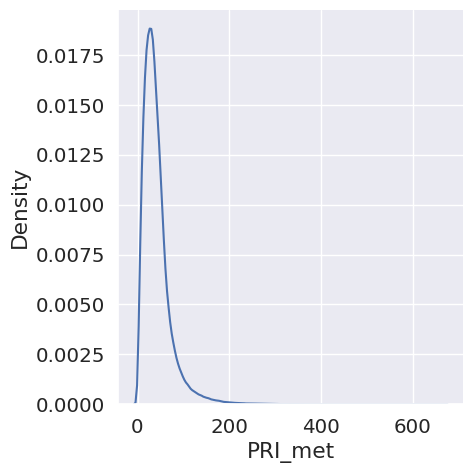

In [ ]:
sns.displot(df, x="PRI_met", kind="kde")

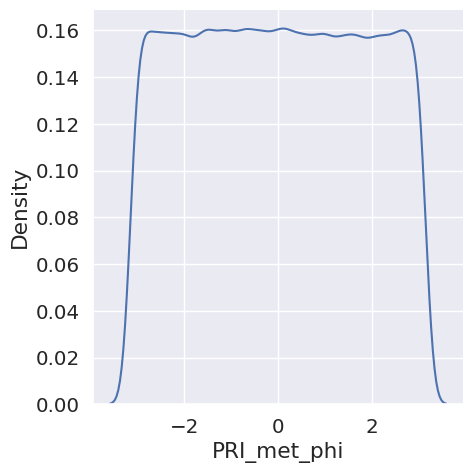

In [ ]:
sns.displot(df, x="PRI_met_phi", kind="kde")

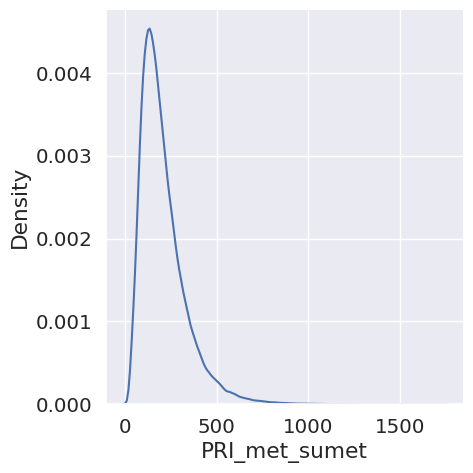

In [ ]:
sns.displot(df, x="PRI_met_sumet", kind="kde")

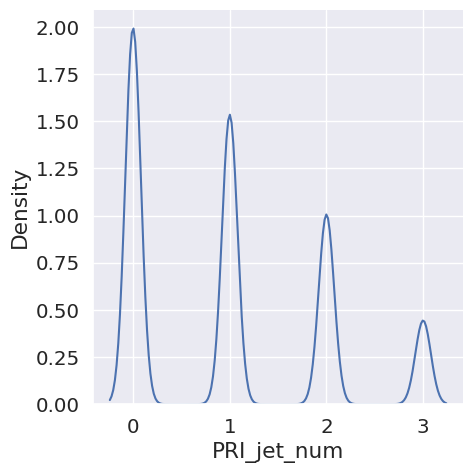

In [ ]:
sns.displot(df, x="PRI_jet_num", kind="kde")

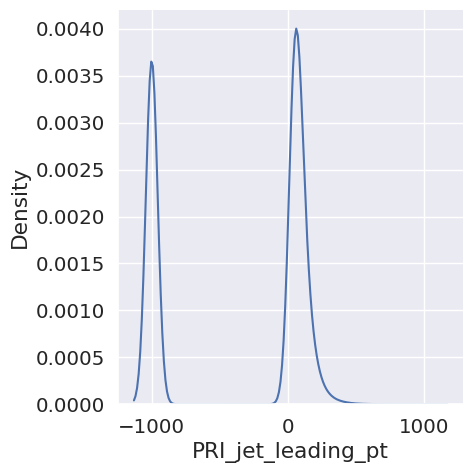

In [ ]:
sns.displot(df, x="PRI_jet_leading_pt", kind="kde")

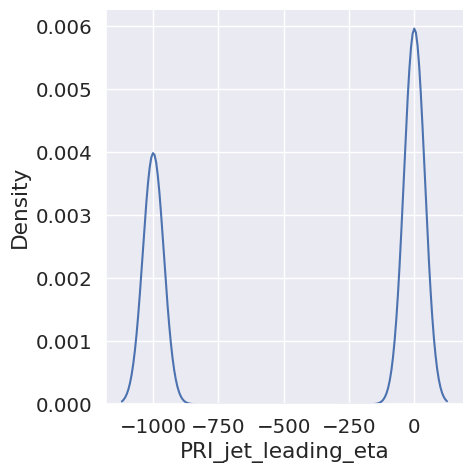

In [ ]:
sns.displot(df, x="PRI_jet_leading_eta", kind="kde")

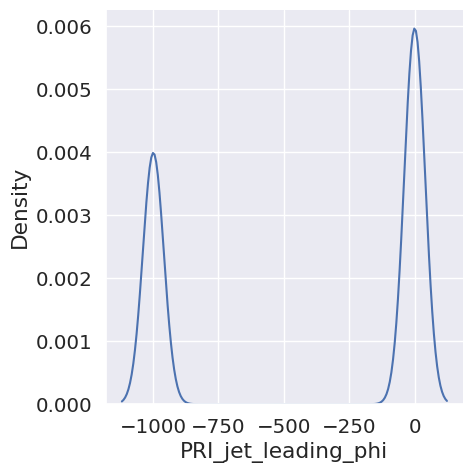

In [ ]:
sns.displot(df, x="PRI_jet_leading_phi", kind="kde")

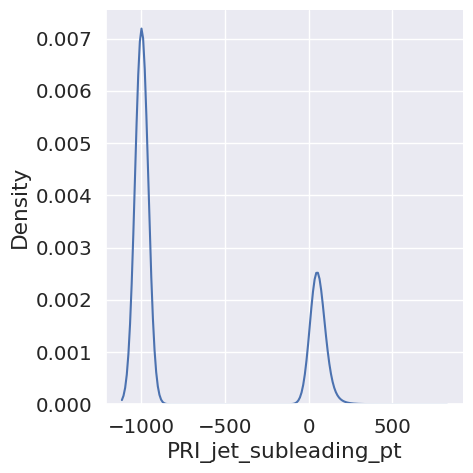

In [ ]:
sns.displot(df, x="PRI_jet_subleading_pt", kind="kde")

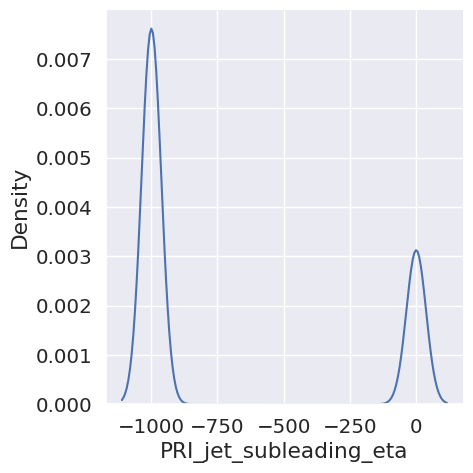

In [ ]:
sns.displot(df, x="PRI_jet_subleading_eta", kind="kde")

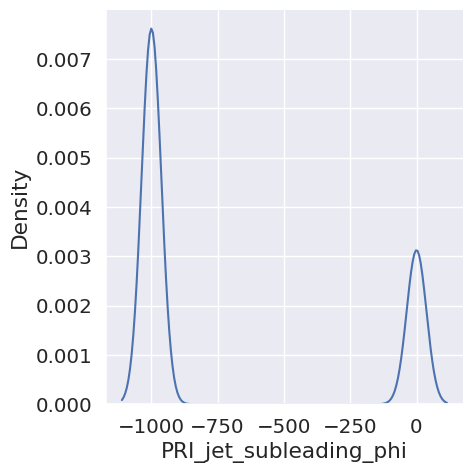

In [ ]:
sns.displot(df, x="PRI_jet_subleading_phi", kind="kde")

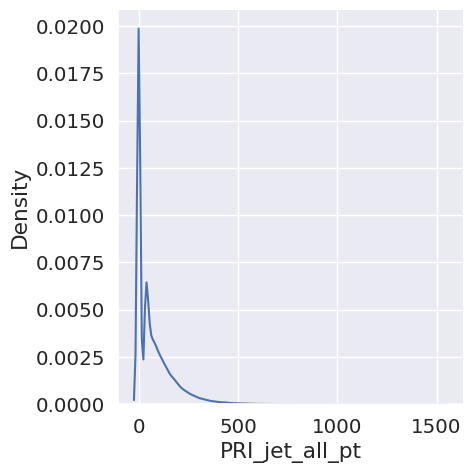

In [ ]:
sns.displot(df, x="PRI_jet_all_pt", kind="kde")

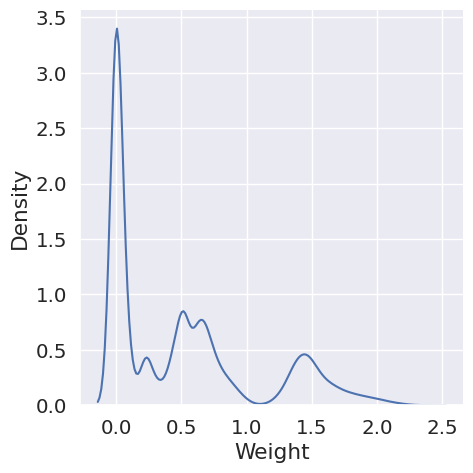

In [ ]:
sns.displot(df, x="Weight", kind="kde")

We have used subplots for 31 columns... we can also plot the distribution graphs individually..I have chosen to visualize the density plots individually to observe the kind of skewness and perform appropriate transformations

### Performing transformation

As we have mostly right skewed data we will perform log transform

In [ ]:
df['DER_mass_MMC'] = np.log(df['DER_mass_MMC'])

In [ ]:
df['DER_mass_transverse_met_lep'] = np.log(df['DER_mass_transverse_met_lep'])

In [ ]:
df['DER_mass_vis'] = np.log(df['DER_mass_vis'])

In [ ]:
df['DER_pt_h'] = np.log(df['DER_pt_h'])

In [ ]:
df['DER_deltaeta_jet_jet'] = np.log(df['DER_deltaeta_jet_jet'])

In [ ]:
df['DER_mass_jet_jet'] = np.log(df['DER_mass_jet_jet'])

In [ ]:
df['DER_prodeta_jet_jet'] = np.log(df['DER_prodeta_jet_jet'])

In [ ]:
df['DER_deltar_tau_lep'] = np.log(df['DER_deltar_tau_lep'])

In [ ]:
df['DER_pt_tot'] = np.log(df['DER_pt_tot'])

In [ ]:
df['DER_sum_pt'] = np.log(df['DER_sum_pt'])

In [ ]:
df['DER_pt_ratio_lep_tau'] = np.log(df['DER_pt_ratio_lep_tau'])

In [ ]:
df['DER_met_phi_centrality'] = np.log(df['DER_met_phi_centrality'])

In [ ]:
df['PRI_tau_pt'] = np.log(df['PRI_tau_pt'])

In [ ]:
df['PRI_tau_eta'] = np.log(df['PRI_tau_eta'])

In [ ]:
df['PRI_tau_phi'] = np.log(df['PRI_tau_phi'])

In [ ]:
df['PRI_lep_pt'] = np.log(df['PRI_lep_pt'])

In [ ]:
df['PRI_lep_eta'] = np.log(df['PRI_lep_eta'])

In [ ]:
df['PRI_lep_phi'] = np.log(df['PRI_lep_phi'])

In [ ]:
df['PRI_met'] = np.log(df['PRI_met'])

In [ ]:
df['PRI_met_phi'] = np.log(df['PRI_met_phi'])

In [ ]:
df['PRI_met_sumet'] = np.log(df['PRI_met_sumet'])

In [ ]:
df['PRI_jet_all_pt'] = np.log(df['PRI_jet_all_pt'])

In [ ]:
df['Weight'] = np.log(df['Weight'])

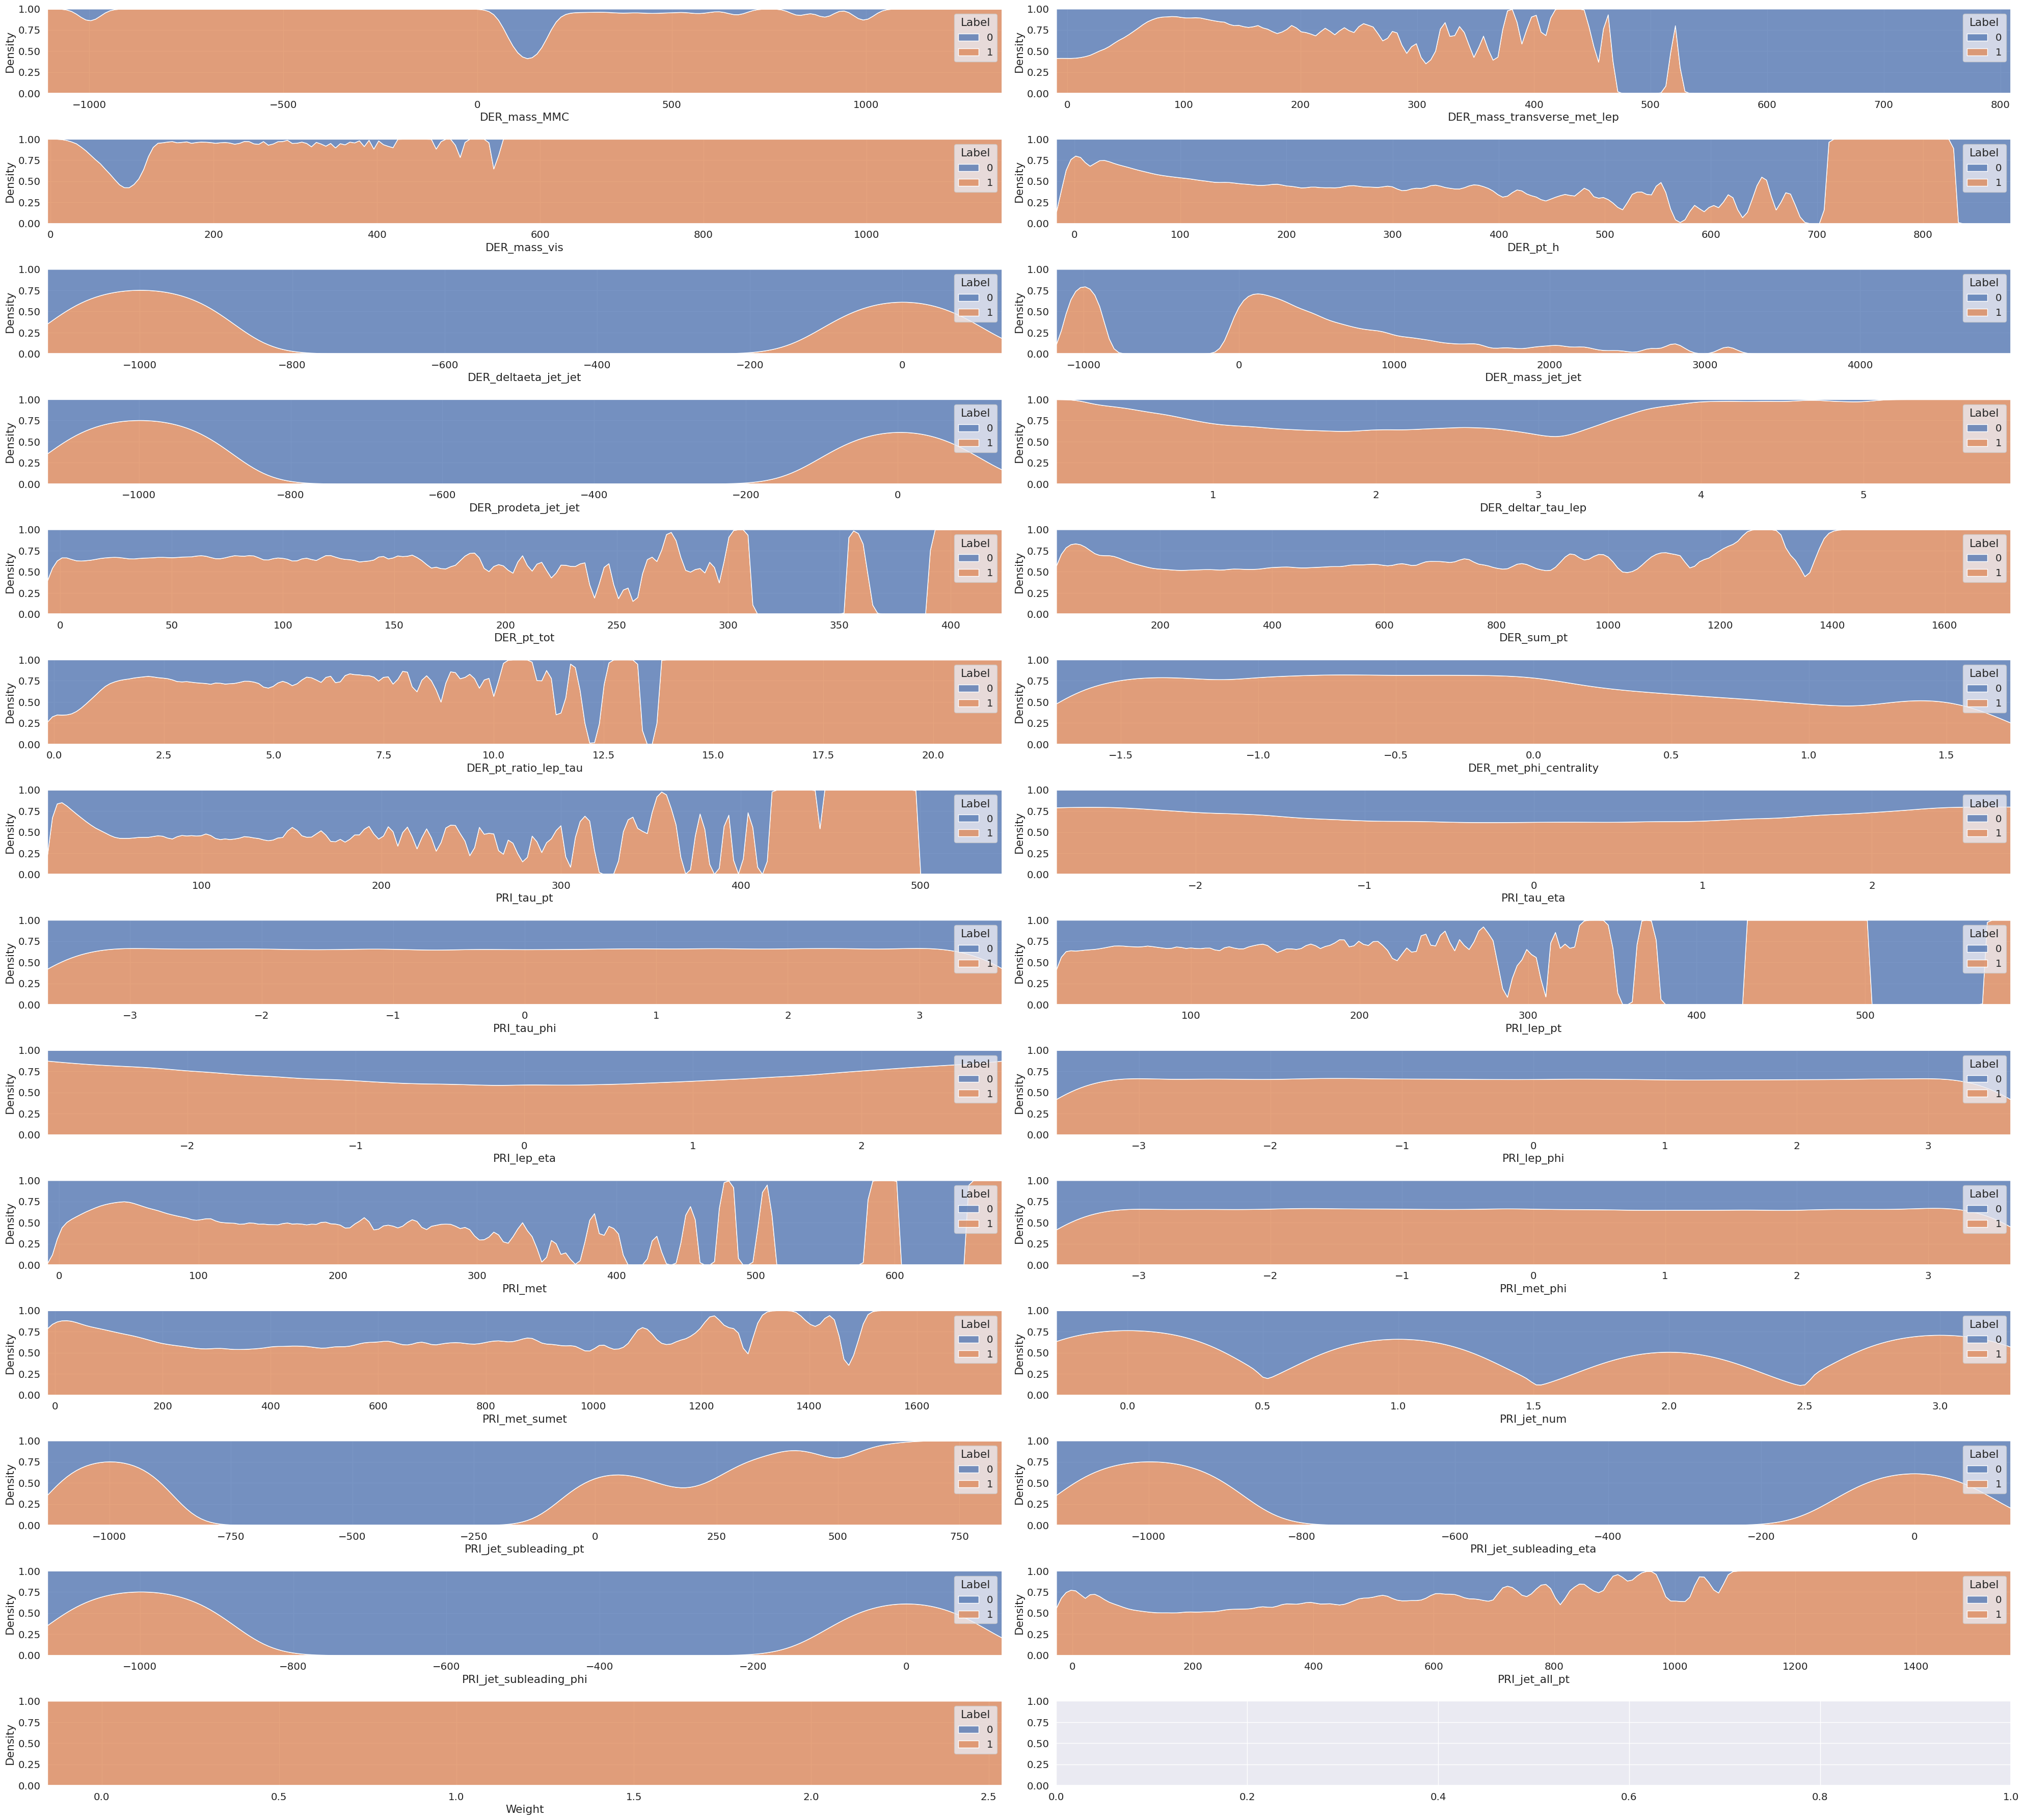

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(14, 2, figsize=(40, 36))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(feat):
  plot = sns.kdeplot(data=train, x=c, hue='Label', multiple='fill', ax=axes[i])
plt.tight_layout()

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df.fillna(-999, inplace=True)

In [ ]:
df1=df.drop('Label',axis=1)

In [ ]:


# Select features and target variable
features = df.drop(['Weight', 'Label', 'KaggleSet', 'KaggleWeight'], axis=1)  # Exclude non-feature columns
target = df['Label']  # Assuming 'Label' is the target variable

# Compute Mean Absolute Deviation (MAD) for each feature
mad_values = features.apply(lambda x: x.mad())

# Sort features by Mean Absolute Deviation (MAD) in descending order
sorted_features = mad_values.sort_values(ascending=False)

# Select the top k features based on MAD
k = 25  # Number of features to select
selected_features = sorted_features.head(k)

print("Selected Features based on Mean Absolute Deviation (MAD):")
print(selected_features)


Selected Features based on Mean Absolute Deviation (MAD):
PRI_jet_leading_pt             520.469272
PRI_met_phi                    499.564787
PRI_tau_phi                    499.512938
PRI_lep_eta                    499.314892
PRI_tau_eta                    499.305979
PRI_lep_phi                    499.110758
DER_met_phi_centrality         496.095539
PRI_jet_all_pt                 481.902211
PRI_jet_leading_eta            479.724964
PRI_jet_leading_phi            479.713330
PRI_jet_subleading_pt          436.336642
DER_mass_jet_jet               414.682233
DER_lep_eta_centrality         412.614000
DER_deltaeta_jet_jet           412.578648
PRI_jet_subleading_eta         412.422560
PRI_jet_subleading_phi         412.419036
DER_mass_MMC                   258.418187
DER_prodeta_jet_jet            218.851964
DER_pt_tot                       1.432887
DER_pt_h                         1.432522
DER_mass_transverse_met_lep      0.877371
PRI_jet_num                      0.784950
PRI_met           

In [ ]:

# Select features and target variable
features = df.drop(['Weight', 'Label', 'KaggleSet', 'KaggleWeight'], axis=1)  # Exclude non-feature columns
target = df['Label']  # Assuming 'Label' is the target variable

# Calculate correlation coefficients between features and target
correlations = features.apply(lambda x: x.corr(target))

# Sort the features by absolute correlation values
sorted_features = correlations.abs().sort_values(ascending=False)

# Select the top k features based on correlation strength
k = 23  # Number of features to select
selected_features = sorted_features.head(k)

print("Selected Features:")
print(selected_features)


Selected Features:
PRI_tau_pt                     0.296982
DER_met_phi_centrality         0.277796
DER_pt_ratio_lep_tau           0.259215
DER_mass_MMC                   0.239266
DER_sum_pt                     0.203890
PRI_met_sumet                  0.176070
PRI_jet_leading_pt             0.161813
PRI_jet_all_pt                 0.154823
PRI_jet_leading_eta            0.154711
PRI_jet_leading_phi            0.154701
DER_mass_jet_jet               0.144364
DER_deltaeta_jet_jet           0.144342
DER_lep_eta_centrality         0.144272
PRI_jet_subleading_eta         0.144190
PRI_jet_subleading_phi         0.144188
PRI_jet_subleading_pt          0.143559
PRI_jet_num                    0.137617
DER_mass_transverse_met_lep    0.131698
DER_mass_vis                   0.091128
PRI_met                        0.058136
PRI_lep_pt                     0.039148
DER_deltar_tau_lep             0.037244
DER_pt_h                       0.023781
dtype: float64


In [ ]:

target = df['Label']  # Assuming 'Label' is the target variable

# Min-max normalize the features
normalized_features = (features - features.min()) / (features.max() - features.min())

# Compute the mean normalized value for each feature
mean_normalized_values = normalized_features.mean()

# Sort features by mean normalized value in descending order
sorted_features = mean_normalized_values.sort_values(ascending=False)

# Select the top k features based on mean normalized value
k = 20  # Number of features to select
selected_features = sorted_features.head(k)

print("Selected Features based on Min-Max Normalization:")
print(selected_features)


Selected Features based on Min-Max Normalization:
DER_mass_transverse_met_lep    0.996813
DER_pt_h                       0.996371
DER_pt_tot                     0.995995
DER_mass_MMC                   0.845838
DER_deltar_tau_lep             0.703174
PRI_met                        0.680296
PRI_jet_all_pt                 0.597819
PRI_jet_leading_phi            0.597593
PRI_jet_leading_eta            0.596799
PRI_met_sumet                  0.516926
PRI_lep_phi                    0.514692
DER_pt_ratio_lep_tau           0.512504
PRI_met_phi                    0.497775
PRI_tau_eta                    0.496073
PRI_lep_eta                    0.494070
PRI_tau_phi                    0.493966
DER_met_phi_centrality         0.458696
DER_mass_vis                   0.456746
PRI_jet_num                    0.326643
PRI_jet_leading_pt             0.318439
dtype: float64


In [ ]:
df = df[['DER_mass_transverse_met_lep','DER_pt_h','DER_pt_tot','DER_mass_MMC','DER_deltar_tau_lep','PRI_met','PRI_jet_all_pt','PRI_jet_leading_phi','PRI_jet_leading_eta','PRI_met_sumet','PRI_lep_phi','DER_pt_ratio_lep_tau','PRI_met_phi','PRI_tau_eta','PRI_lep_eta','PRI_tau_phi','DER_met_phi_centrality','DER_mass_vis','PRI_jet_num','PRI_jet_leading_pt']]

In [ ]:
df.to_csv('new1.csv', index=False)

In [ ]:
import os
os.listdir()


['.config', 'new1.csv', 'part1.csv', 'sample_data']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import pickle


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your dataset (assuming it's in a DataFrame named 'df')
# You can load your dataset using pd.read_csv or any other suitable method

# Define the feature columns and the target variable
selected_features = [
    "DER_mass_transverse_met_lep",
    "DER_pt_h",
    "DER_pt_tot",
    "DER_mass_MMC",
    "DER_deltar_tau_lep",
    "PRI_met",
    "PRI_jet_all_pt",
    "PRI_jet_leading_phi",
    "PRI_jet_leading_eta",
    "PRI_met_sumet",
    "PRI_lep_phi",
    "DER_pt_ratio_lep_tau",
    "PRI_met_phi",
    "PRI_tau_eta",
    "PRI_lep_eta",
    "PRI_tau_phi",
    "DER_met_phi_centrality",
    "DER_mass_vis",
    "PRI_jet_num",
    "PRI_jet_leading_pt"
]
X = df[selected_features]  # Features
y = df['Label']  # Target variable (replace 'target_column' with your actual target column name)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = SVC(kernel='linear')  # You can choose a different kernel as needed

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
